In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.ensemble import RandomForestClassifier, RandomForestRegressor
from sklearn.metrics import accuracy_score, mean_squared_error, classification_report, confusion_matrix

import warnings
warnings.filterwarnings('ignore')

In [ ]:
df_pizza = pd.read_csv("/content/drive/MyDrive/FileScrapping/pizza_sales.csv")

In [ ]:
df_pizza.head()

,pizza_id,order_id,pizza_name_id,quantity,order_date,unit_price,total_price,pizza_size,pizza_category,pizza_ingredients,pizza_name
0,1,1,hawaiian_m,1,01-01-2015,13.25,13.25,M,Classic,"Sliced Ham, Pineapple, Mozzarella Cheese",The Hawaiian Pizza
1,2,2,classic_dlx_m,1,01-01-2015,16.00,16.00,M,Classic,"Pepperoni, Mushrooms, Red Onions, Red Peppers,...",The Classic Deluxe Pizza
2,3,2,five_cheese_l,1,01-01-2015,18.50,18.50,L,Veggie,"Mozzarella Cheese, Provolone Cheese, Smoked Go...",The Five Cheese Pizza
3,4,2,ital_supr_l,1,01-01-2015,20.75,20.75,L,Supreme,"Calabrese Salami, Capocollo, Tomatoes, Red Oni...",The Italian Supreme Pizza
4,5,2,mexicana_m,1,01-01-2015,16.00,16.00,M,Veggie,"Tomatoes, Red Peppers, Jalapeno Peppers, Red O...",The Mexicana Pizza


In [ ]:
data_types = df_pizza.dtypes
print("Data Types of Columns:")
print(data_types)

Data Types of Columns:
pizza_id               int64
order_id               int64
pizza_name_id         object
quantity               int64
order_date            object
unit_price           float64
total_price          float64
pizza_size            object
pizza_category        object
pizza_ingredients     object
pizza_name            object
dtype: object


In [ ]:
df_pizza.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48620 entries, 0 to 48619
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   pizza_id           48620 non-null  int64  
 1   order_id           48620 non-null  int64  
 2   pizza_name_id      48620 non-null  object 
 3   quantity           48620 non-null  int64  
 4   order_date         48620 non-null  object 
 5   unit_price         48620 non-null  float64
 6   total_price        48620 non-null  float64
 7   pizza_size         48620 non-null  object 
 8   pizza_category     48620 non-null  object 
 9   pizza_ingredients  48620 non-null  object 
 10  pizza_name         48620 non-null  object 
dtypes: float64(2), int64(3), object(6)
memory usage: 4.1+ MB


In [ ]:
df_pizza.describe()

,pizza_id,order_id,quantity,unit_price,total_price
count,48620.000000,48620.000000,48620.000000,48620.000000,48620.000000
mean,24310.500000,10701.479761,1.019622,16.494132,16.821474
std,14035.529381,6180.119770,0.143077,3.621789,4.437398
min,1.000000,1.000000,1.000000,9.750000,9.750000
25%,12155.750000,5337.000000,1.000000,12.750000,12.750000
50%,24310.500000,10682.500000,1.000000,16.500000,16.500000
75%,36465.250000,16100.000000,1.000000,20.250000,20.500000
max,48620.000000,21350.000000,4.000000,35.950000,83.000000


In [ ]:
df_pizza.isnull().sum()

pizza_id             0
order_id             0
pizza_name_id        0
quantity             0
order_date           0
unit_price           0
total_price          0
pizza_size           0
pizza_category       0
pizza_ingredients    0
pizza_name           0
dtype: int64

In [ ]:
df_pizza['order_date'] = pd.to_datetime(df_pizza['order_date'], dayfirst=True)

In [ ]:
numeric_columns = df_pizza.select_dtypes(include=[np.number])

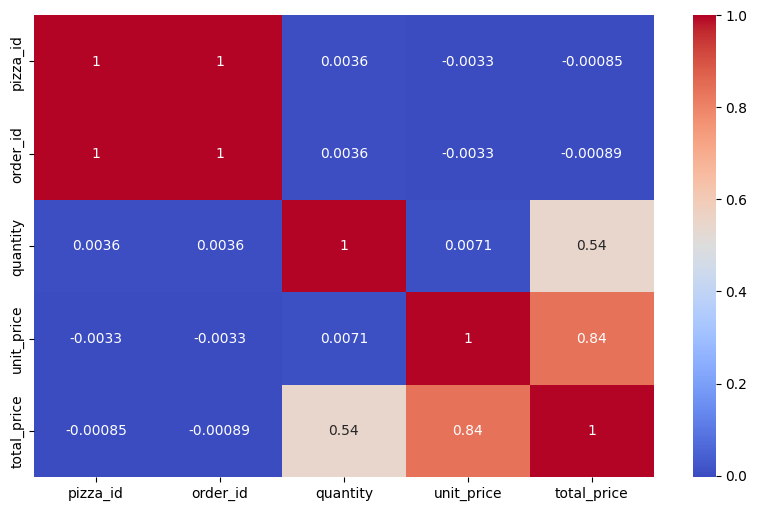

In [ ]:
plt.figure(figsize=(10, 6))
sns.heatmap(numeric_columns.corr(), annot=True, cmap='coolwarm')
plt.show()

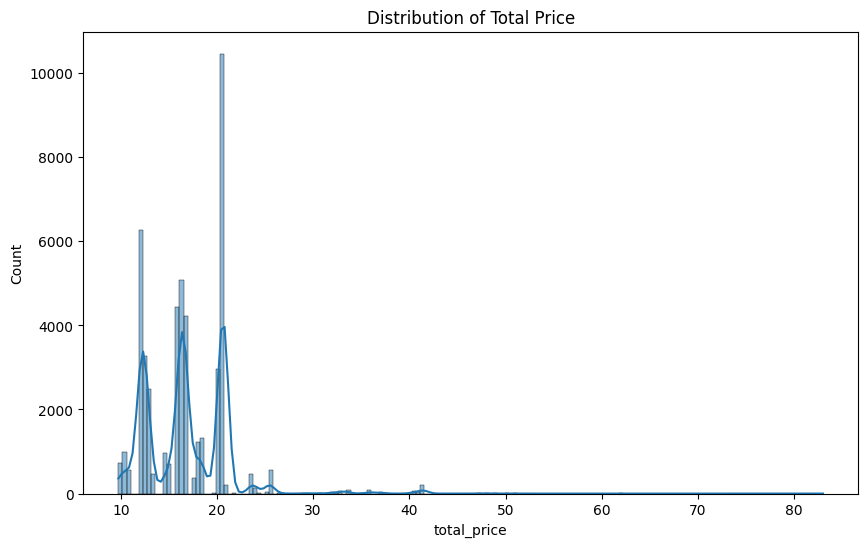

In [ ]:
plt.figure(figsize=(10, 6))
sns.histplot(df_pizza['total_price'], kde=True)
plt.title('Distribution of Total Price')
plt.show()

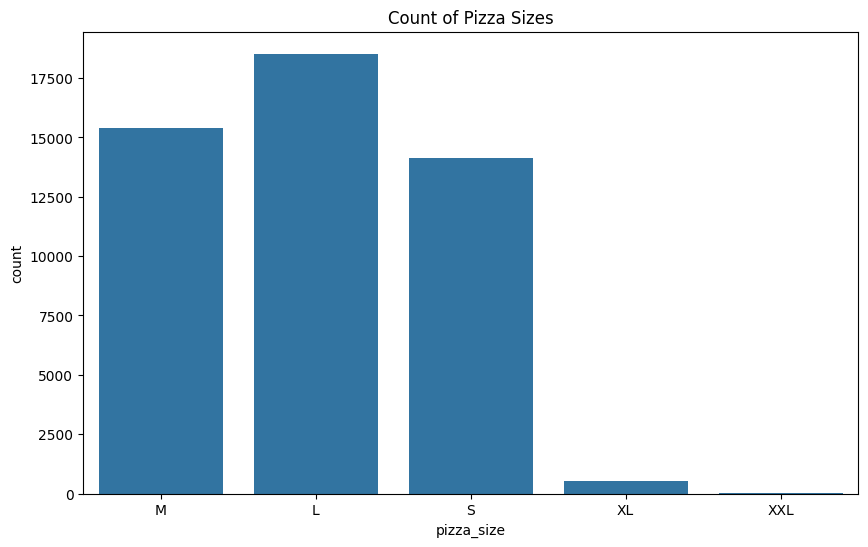

In [ ]:
plt.figure(figsize=(10, 6))
sns.countplot(data=df_pizza, x='pizza_size')
plt.title('Count of Pizza Sizes')
plt.show()

In [ ]:
label_encoders = {}
for column in ['pizza_name_id', 'pizza_size', 'pizza_category', 'pizza_ingredients', 'pizza_name']:
    le = LabelEncoder()
    df_pizza[column] = le.fit_transform(df_pizza[column])
    label_encoders[column] = le


In [ ]:
X = df_pizza.drop(columns=['total_price', 'order_date'])
y_classification = df_pizza['pizza_category']
y_regression = df_pizza['total_price']

In [ ]:
X_train, X_test, y_train_classification, y_test_classification = train_test_split(X, y_classification, test_size=0.2, random_state=42)
_, _, y_train_regression, y_test_regression = train_test_split(X, y_regression, test_size=0.2, random_state=42)


In [ ]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [ ]:
clf = RandomForestClassifier(n_estimators=100, random_state=42)
clf.fit(X_train, y_train_classification)

RandomForestClassifier(random_state=42)

In [ ]:
y_pred_classification = clf.predict(X_test)

In [ ]:
print("Classification Report:\n", classification_report(y_test_classification, y_pred_classification))

Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00      2155
           1       1.00      1.00      1.00      2935
           2       1.00      1.00      1.00      2357
           3       1.00      1.00      1.00      2277

    accuracy                           1.00      9724
   macro avg       1.00      1.00      1.00      9724
weighted avg       1.00      1.00      1.00      9724



In [ ]:
print("Confusion Matrix:\n", confusion_matrix(y_test_classification, y_pred_classification))

Confusion Matrix:
 [[2155    0    0    0]
 [   0 2935    0    0]
 [   0    0 2357    0]
 [   0    0    0 2277]]


In [ ]:
print("Accuracy Score:", accuracy_score(y_test_classification, y_pred_classification))

Accuracy Score: 1.0


In [ ]:
reg = RandomForestRegressor(n_estimators=100, random_state=42)
reg.fit(X_train, y_train_regression)

RandomForestRegressor(random_state=42)

In [ ]:
y_pred_regression = reg.predict(X_test)

In [ ]:
mse = mean_squared_error(y_test_regression, y_pred_regression)
rmse = np.sqrt(mse)
print("Mean Squared Error:", mse)

Mean Squared Error: 0.00941217179144385


In [ ]:
print("Root Mean Squared Error:", rmse)

Root Mean Squared Error: 0.09701634806280769
